# 导入相关依赖，定义工具函数


In [1]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
TEST_SIZE=0.33
# 读入数据
def get_data_numpyArray(file_path):
    data = load_svmlight_file(file_path)
    return data[0].toarray(), data[1]


#将具有-1和1的标签数组转化为0和1的标签数组
def transform_ylable_from_posNe1_to_01(ylables):
    return np.array([int(y_item/2 + 0.5) for y_item in ylables])

#给数据集加一列1
def add_X_bColumn(X):
   b_train = np.ones(X.shape[0])
   return np.c_[X, b_train]


#根据损失函数计算当前W的损失
def compute_lost(X,y,W):
    lost = np.dot((y - np.dot(X,W)).transpose(),y - np.dot(X,W))
    return lost[0][0]/(X.shape[0])

#返回值为每次迭代后W在训练集和测试集上损失   
def regression_f(X_train,y_train,X_test,y_test,W,numiter,ALPHA):
    iterations=[]
    lost_y_train = []
    lost_y_test = []
    for i in range(1,numiter+1):
        #计算梯度
        w_theta = 2 * np.dot(X_train.transpose(), np.dot(X_train, W) - y_train)/X_train.shape[0]
        #更新参数
        W -= ALPHA * w_theta    
        lost_train = compute_lost(X_train,y_train,W)
        lost_test = compute_lost(X_test,y_test,W)
        iterations.append(i)
        lost_y_train.append(lost_train)
        lost_y_test.append(lost_test)
    return iterations,lost_y_train,lost_y_test

# 加载数据集，进行预处理

In [2]:
#加载数据集
X, y = get_data_numpyArray("housing_scale.txt")
#把训练集添加一列全1，即添加参数b
X = add_X_bColumn(X)
#分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33)
#将数据集的标签转化为列向量，方便使用矩阵乘法计算梯度
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
#全0初始化参数矩阵
W = np.zeros((X.shape[1],1))
#画图的线形状
line_styles = [':','-','-.']

# 画出学习率的对比图

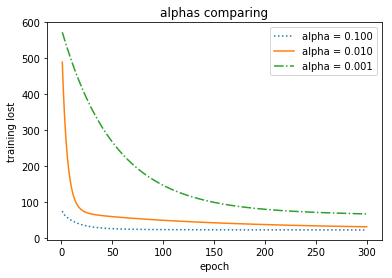

In [3]:
alphas = [0.1,0.01,0.001]
plt.figure(1)
plt.xlabel('epoch')
plt.ylabel('training lost')
plt.title('alphas comparing')
for alpha,line_style in zip(alphas,line_styles):
    iterations,lost_y_train,lost_y_test = regression_f(X_train,y_train,X_test,y_test,W.copy(),300,alpha)
    plt.plot(iterations, lost_y_train,line_style, label='alpha = %.3f' % (alpha))
plt.legend()
plt.show()

# 画出迭代次数的对比图

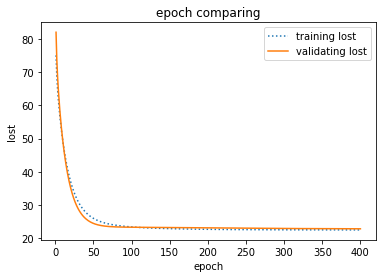

In [4]:
plt.figure(2)
plt.xlabel('epoch')
plt.ylabel('lost')
plt.title('epoch comparing')
iterations,lost_y_train,lost_y_test = regression_f(X_train,y_train,X_test,y_test,W.copy(),400,0.1)
plt.plot(iterations, lost_y_train, line_styles[0],label='training lost')
plt.plot(iterations, lost_y_test, line_styles[1],label='validating lost')
plt.legend()
plt.show()

# 画出最终的lost曲线

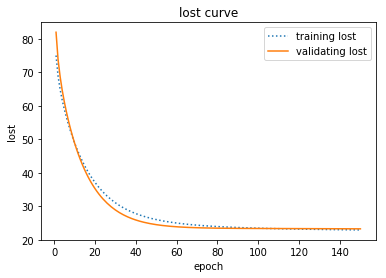

In [5]:
plt.figure(3)
plt.xlabel('epoch')
plt.ylabel('lost')
plt.title('lost curve')
iterations,lost_y_train,lost_y_test = regression_f(X_train,y_train,X_test,y_test,W.copy(),150,0.1)
plt.plot(iterations, lost_y_train,line_styles[0], label='training lost')
plt.plot(iterations, lost_y_test, line_styles[1],label='validating lost')
plt.legend()
plt.show()